In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scanpy as sc

plt.rcParams['text.color'] = 'black'
sc.set_figure_params(dpi=100, dpi_save=300, facecolor='white')
plt.style.use('ggplot')

In [2]:
data = {
    'Method': ['ComGRN', 'all', 'Batch 0', 'Batch 1', 'Batch 2', 'Batch 3'],
    'Non Spec_EPR': [4.04501, 3.0332, 2.9173775, 2.1519975, 2.63839, 3.24155],
    'Non Spec_AUPRratio': [1.88229, 1.50718, 1.482705, 1.2980025, 1.303736667, 1.477816667],
    'Non Spec_AUROC': [0.57222, 0.5515125, 0.5476025, 0.5511325, 0.51756, 0.542766667],
    'Spec_EPR': [1.10925, 1.0398425, 1.030525, 1.022995, 0.550143333, 0.824153333],
    'Spec_AUPRratio': [1.14155, 1.1119075, 1.1034525, 1.06344, 1.071813333, 1.088416667],
    'Spec_AUROC': [0.54352, 0.534525, 0.5278175, 0.52684, 0.52057, 0.530146667],
    'STR_EPR': [5.12274, 4.3380175, 3.720105, 4.31327, 3.68772, 3.978633333],
    'STR_AUPRratio': [2.89036, 2.194335, 1.95389, 2.315365, 1.62525, 2.183693333],
    'STR_AUROC': [0.63128, 0.596375, 0.57571, 0.6008125, 0.549226667, 0.573046667],
    'lofgof_EPR': [1.69231, 1.177455, 1.2203775, 1.2510725, 0.90611, 1.22834],
    'lofgof_AUPRratio': [1.4006, 1.20234, 1.2121975, 1.17139, 1.154326667, 1.161776667],
    'lofgof_AUROC': [0.56956, 0.537775, 0.5338925, 0.5422325, 0.538, 0.535073333]
}

df = pd.DataFrame(data)
df = df.set_index('Method')

In [3]:
df = df[["Non Spec_EPR", "Spec_EPR", "STR_EPR", "lofgof_EPR"]].T

ComGRN
all
Batch 0
Batch 1
Batch 2
Batch 3


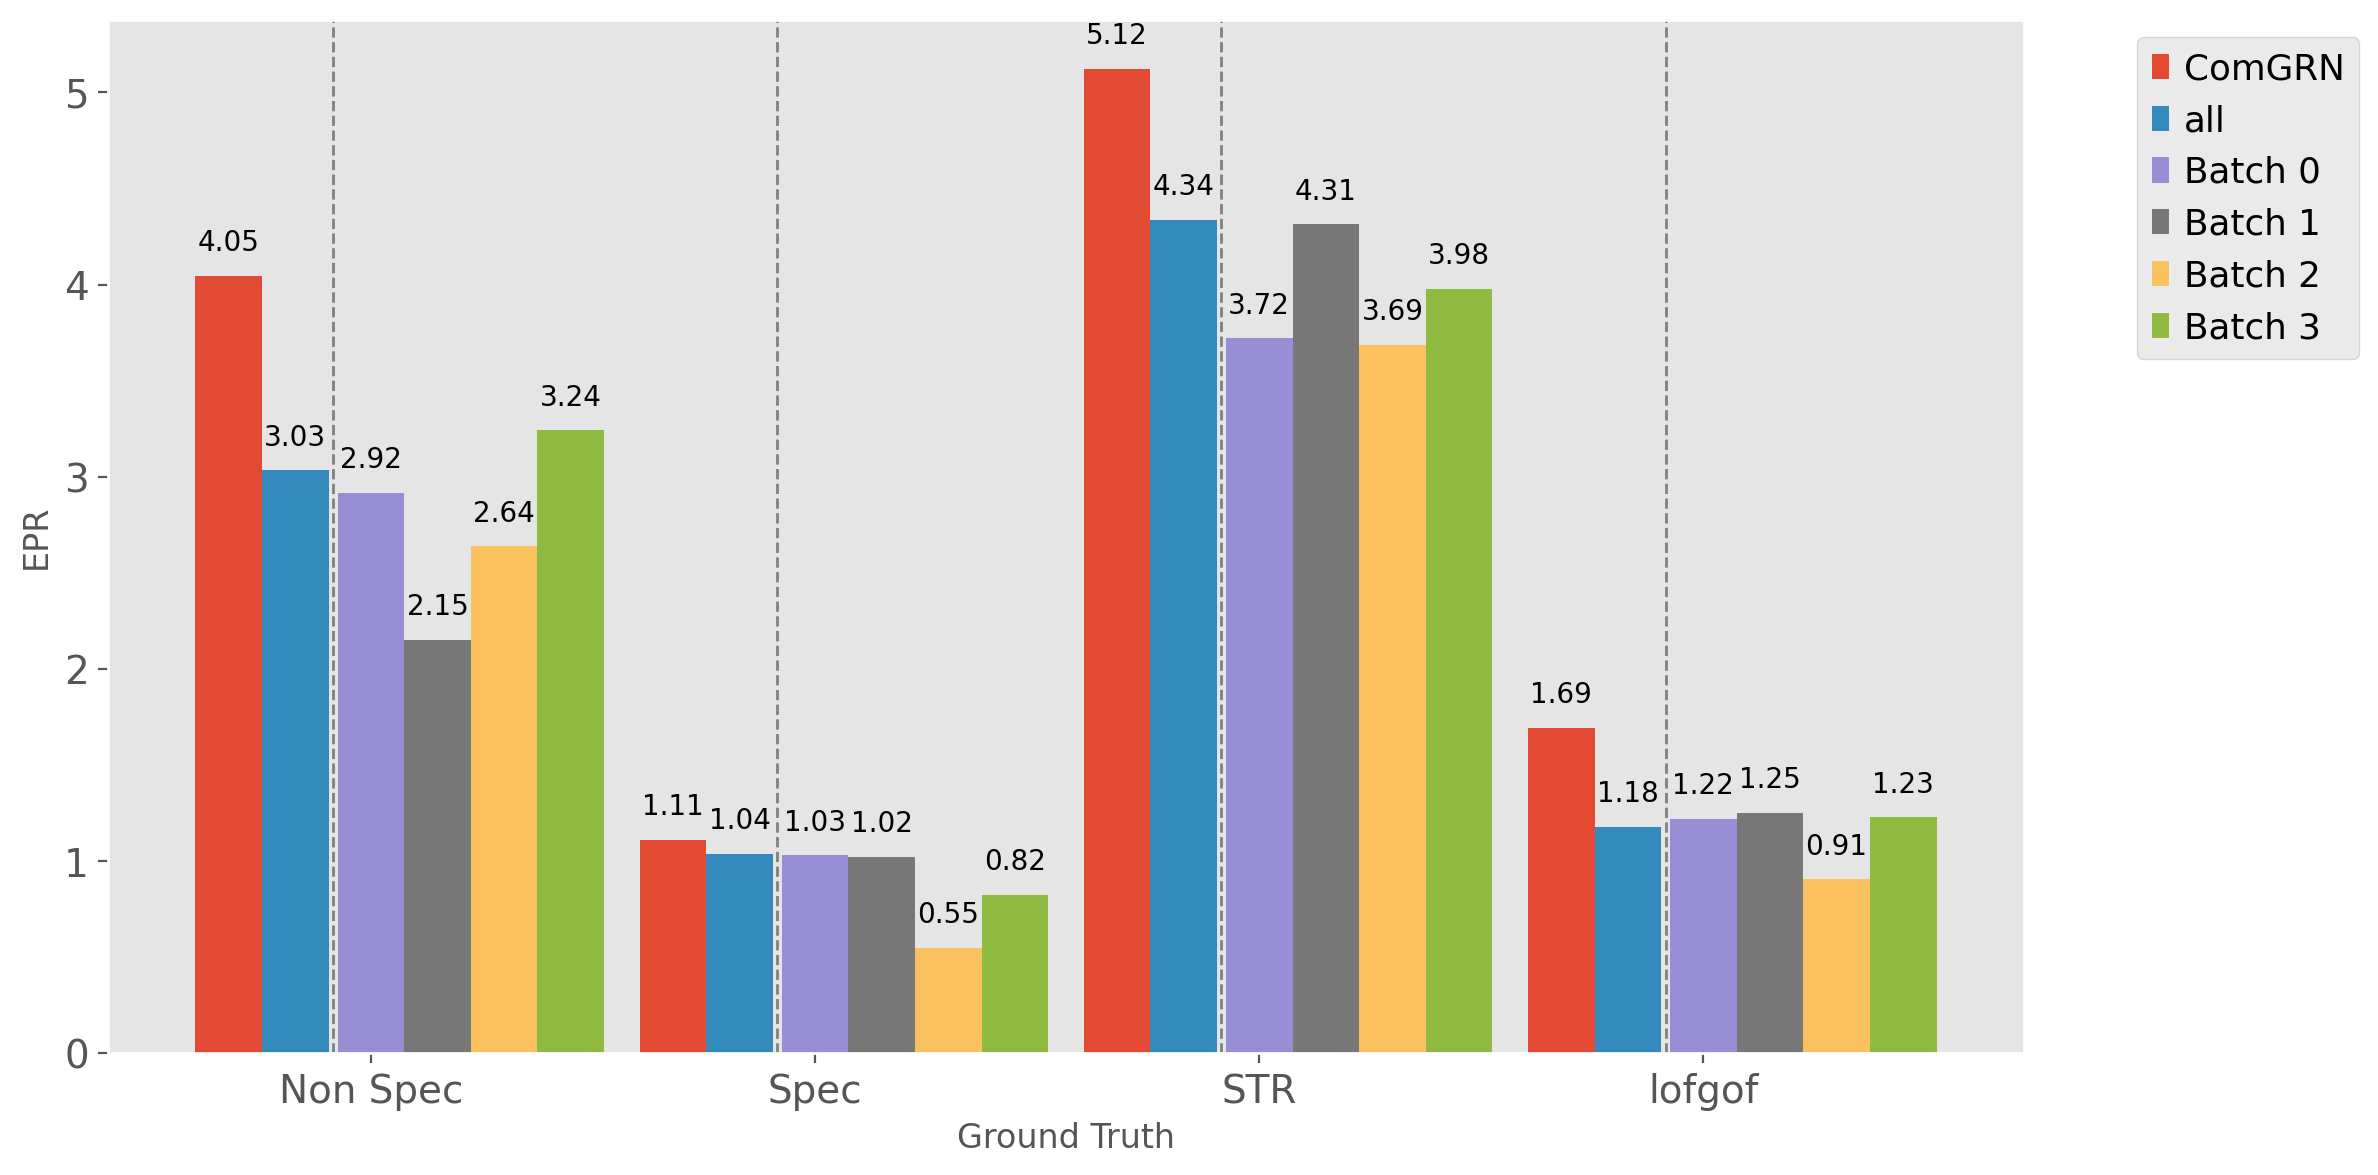

In [4]:
# 设置 Nature 配色方案
# colors = ['#E64B35', '#4DBBD5', '#00A087', '#3C5488', '#F39B7F', '#8491B4', '#91D1C2', '#DC0000', '#7E6148', '#B09C85']

# 绘制条形图
methods = df.index.to_series().apply(lambda x:x.split("_")[0])

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, label in enumerate(df.columns[:2]):
    print(label)
    plt.bar([x + (i-2) * 0.15 - 0.02 for x in range(len(methods))], df[label], width=0.15, 
            label=label, color=list(plt.rcParams['axes.prop_cycle'])[i]['color']) # color=colors[i])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # 在每个柱状图的顶部显示数值
    for index, value in enumerate(df[label]):
        plt.text(index + (i-2) * 0.15 - 0.02, value + 0.1, str(round(value,2)), ha='center', va='bottom')

for i, label in enumerate(df.columns[2:]):
    print(label)
    plt.bar([x + (i) * 0.15 for x in range(len(methods))], df[label], width=0.15, label=label,
            color=list(plt.rcParams['axes.prop_cycle'])[i+2]['color'])# color=colors[i+2])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    for index, value in enumerate(df[label]):
        plt.text(index + (i) * 0.15, value + 0.1, str(round(value,2)), ha='center', va='bottom')

for i in range(len(methods)):
    plt.axvline(i - 0.085, color='gray', linestyle='--', linewidth=1)  # 在每个方法的位置添加纵向虚线
    


ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods)
ax.set_xlabel('Ground Truth')
# ax.set_title('Comparison of Different Methods')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('EPR')
plt.grid(False)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ComGRN
all
Batch 0
Batch 1
Batch 2
Batch 3


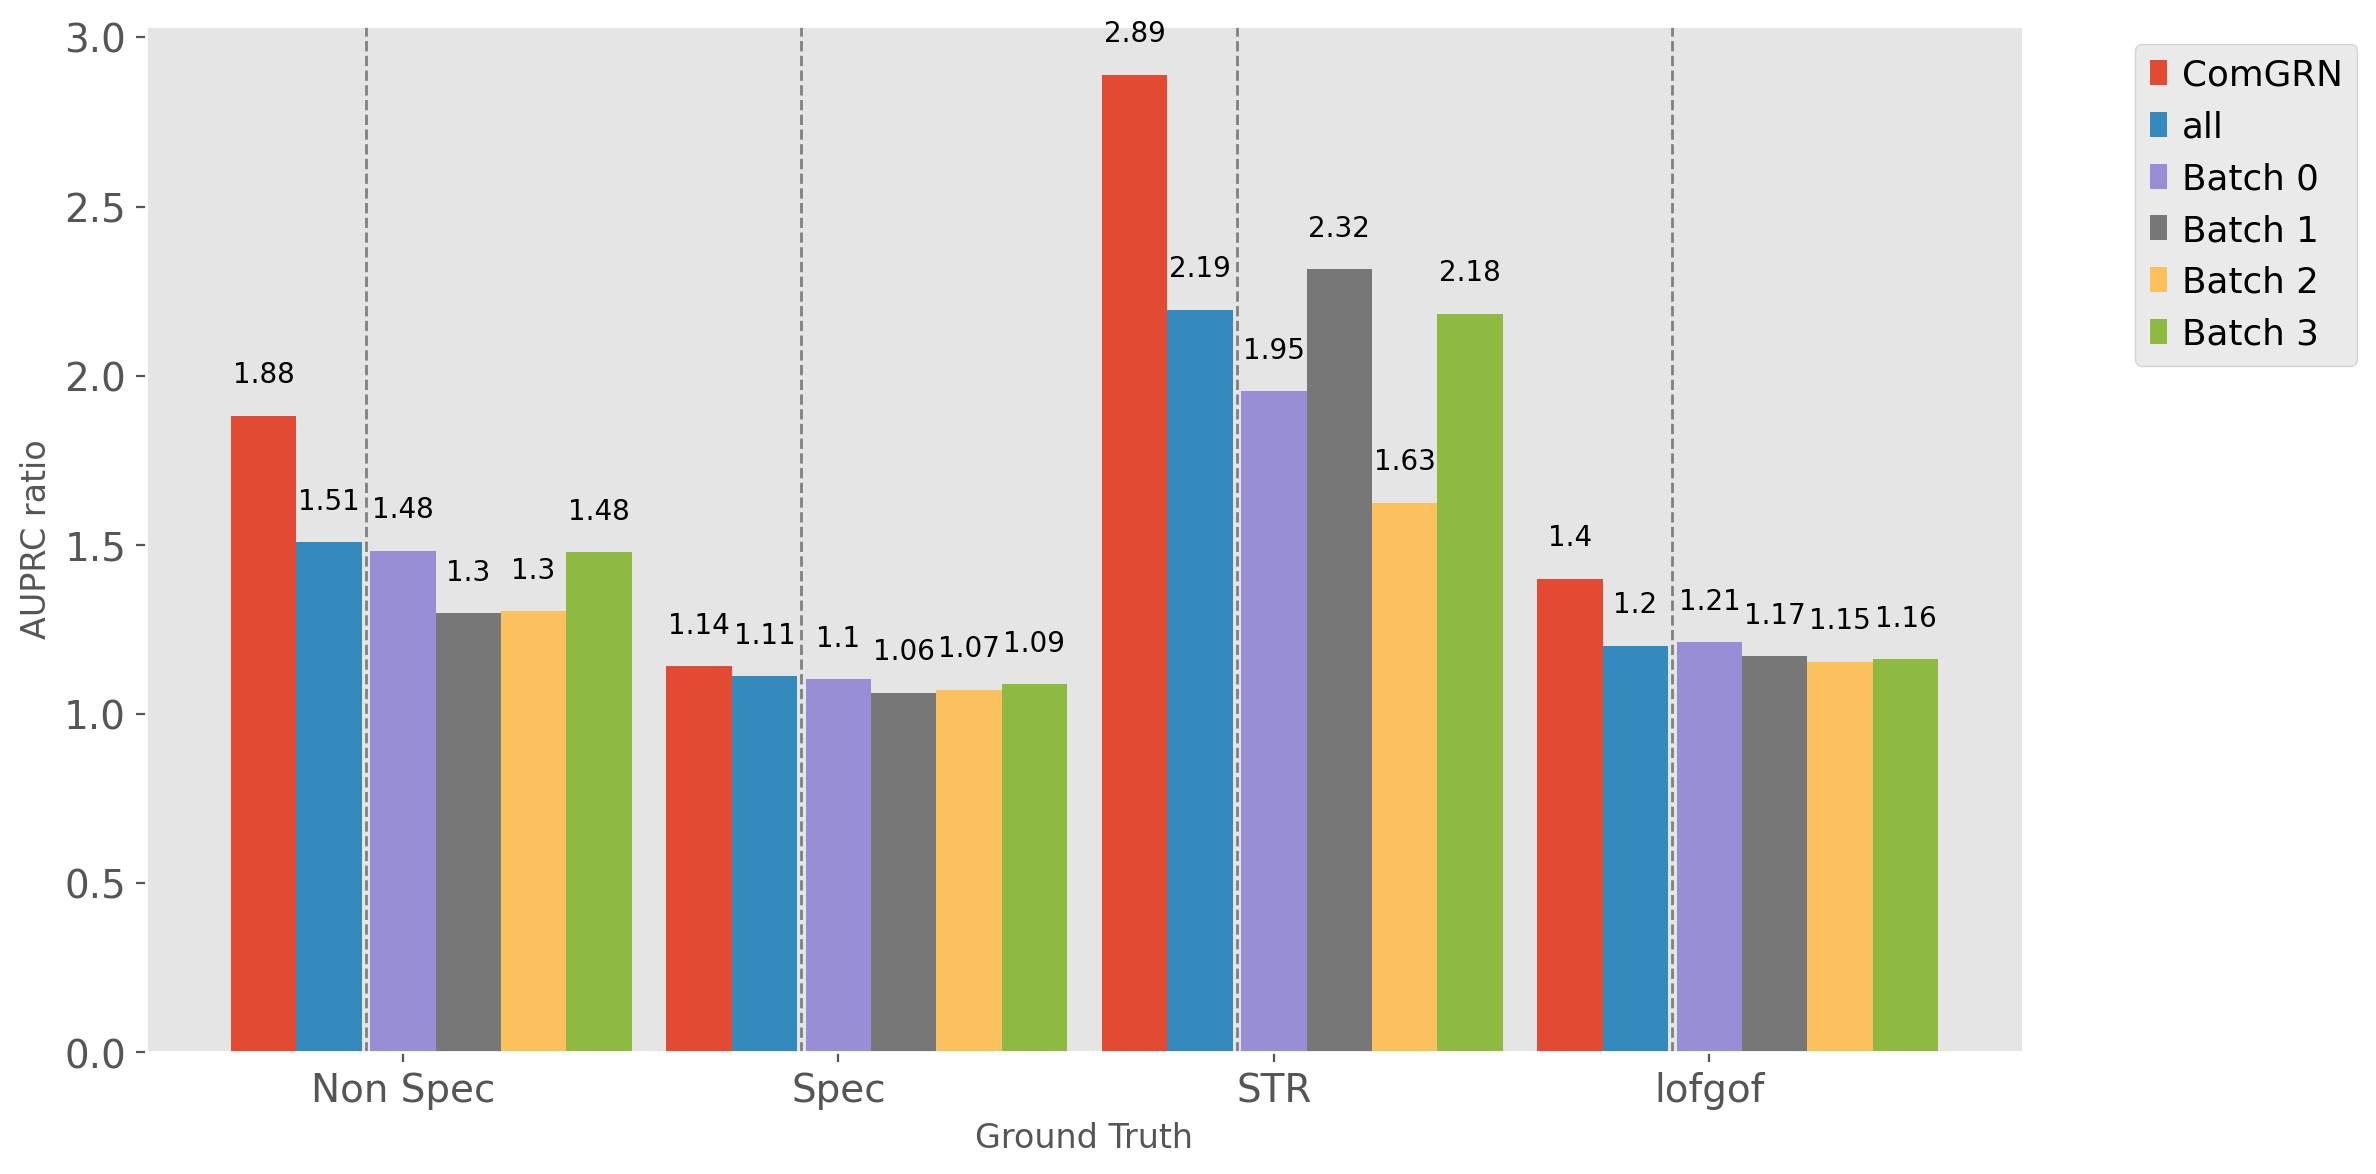

In [5]:
df = pd.DataFrame(data)
df = df.set_index('Method')
df = df[["Non Spec_AUPRratio", "Spec_AUPRratio", "STR_AUPRratio", "lofgof_AUPRratio"]].T

methods = df.index.to_series().apply(lambda x:x.split("_")[0])

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, label in enumerate(df.columns[:2]):
    print(label)
    plt.bar([x + (i-2) * 0.15 - 0.02 for x in range(len(methods))], df[label], width=0.15, 
            label=label, color=list(plt.rcParams['axes.prop_cycle'])[i]['color']) # color=colors[i])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    for index, value in enumerate(df[label]):
        plt.text(index + (i-2) * 0.15 - 0.02, value + 0.08, str(round(value,2)), ha='center', va='bottom')


for i, label in enumerate(df.columns[2:]):
    print(label)
    plt.bar([x + (i) * 0.15 for x in range(len(methods))], df[label], width=0.15, label=label,
            color=list(plt.rcParams['axes.prop_cycle'])[i+2]['color'])# color=colors[i+2])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    for index, value in enumerate(df[label]):
        plt.text(index + (i) * 0.15, value + 0.08, str(round(value,2)), ha='center', va='bottom')


for i in range(len(methods)):
    plt.axvline(i - 0.085, color='gray', linestyle='--', linewidth=1)  # 在每个方法的位置添加纵向虚线

ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods)
ax.set_xlabel('Ground Truth')
# ax.set_title('Comparison of Different Methods')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('AUPRC ratio')
plt.grid(False)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ComGRN
all
Batch 0
Batch 1
Batch 2
Batch 3


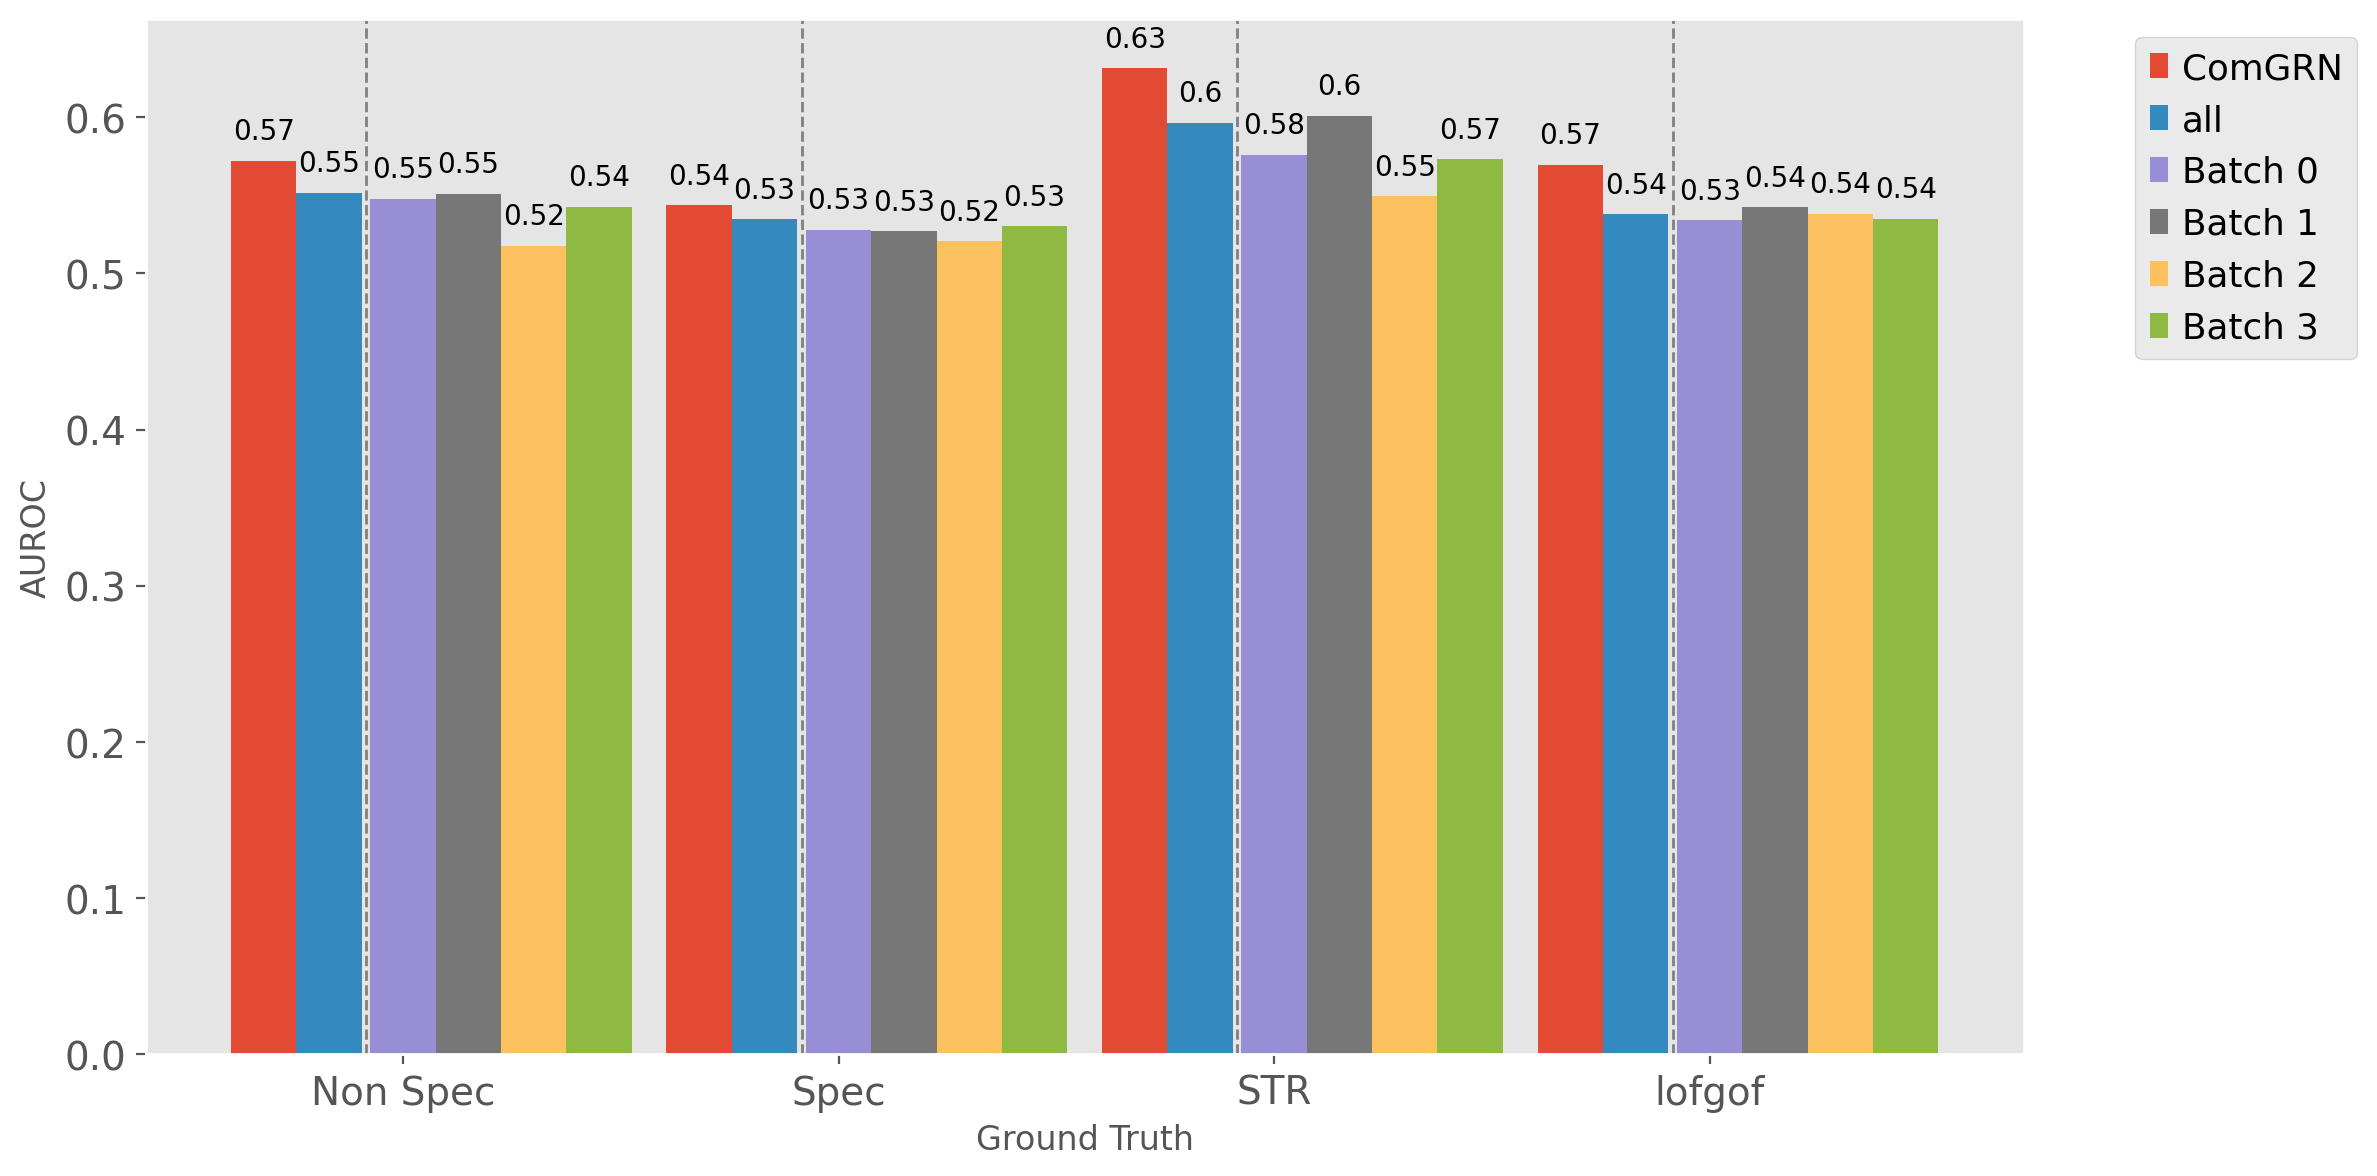

In [6]:
df = pd.DataFrame(data)
df = df.set_index('Method')
df = df[["Non Spec_AUROC", "Spec_AUROC", "STR_AUROC", "lofgof_AUROC"]].T

methods = df.index.to_series().apply(lambda x:x.split("_")[0])

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, label in enumerate(df.columns[:2]):
    print(label)
    plt.bar([x + (i-2) * 0.15 - 0.02 for x in range(len(methods))], df[label], width=0.15, 
            label=label, color=list(plt.rcParams['axes.prop_cycle'])[i]['color']) # color=colors[i])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    for index, value in enumerate(df[label]):
        plt.text(index + (i-2) * 0.15 - 0.02, value + 0.01, str(round(value,2)), ha='center', va='bottom')


for i, label in enumerate(df.columns[2:]):
    print(label)
    plt.bar([x + (i) * 0.15 for x in range(len(methods))], df[label], width=0.15, label=label,
            color=list(plt.rcParams['axes.prop_cycle'])[i+2]['color'])# color=colors[i+2])
    # ax.set_xticklabels(df.index, rotation=45, ha='right')
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    for index, value in enumerate(df[label]):
        plt.text(index + (i) * 0.15, value + 0.01, str(round(value,2)), ha='center', va='bottom')


for i in range(len(methods)):
    plt.axvline(i - 0.085, color='gray', linestyle='--', linewidth=1)  # 在每个方法的位置添加纵向虚线

ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods)
ax.set_xlabel('Ground Truth')
# ax.set_title('Comparison of Different Methods')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('AUROC')
plt.grid(False)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()